<a href="https://colab.research.google.com/github/dsk-yshkw/DataDrivenFinance/blob/main/ch10_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データの整理

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## yfinanceからデータを取得する場合 

In [ ]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 10.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() 

In [ ]:
# Financials
symbols = ('AFL','ALL','AXP','AIG','AMP','AON','AJG','AIZ','BAC',
           'BK','BRK-B','BLK','COF','CBOE','SCHW','CB','CINF','C',
           'CFG','CME','CMA','DFS','RE','FITB','FRC','BEN','GL',
           'GS','HIG','HBAN','ICE','IVZ','JPM','KEY','LNC','L',
           'MTB','MKTX','MMC','MET','MCO','MS','MSCI','NDAQ',
           'NTRS','PBCT','PNC','PFG','PGR','PRU','RJF','RF','SPGI',
           'STT','SIVB','SYF','TROW','TRV','TFC','USB','UNM','WRB',
           'WFC','WTW','ZION'
)

df = pd.DataFrame()
for symbol in symbols:
    print(symbol)
    data = pdr.get_data_yahoo(symbol,start = '2016-02-23',end='2021-02-20')['Adj Close']
    data.name = symbol
    df = pd.concat([df,data],axis = 1)


for i in np.arange(len(df.index)):
    df.index.values[i] = str(df.index[i].date())

df.index = df.index.rename('Date')

AFL
[*********************100%***********************]  1 of 1 completed
ALL
[*********************100%***********************]  1 of 1 completed
AXP
[*********************100%***********************]  1 of 1 completed
AIG
[*********************100%***********************]  1 of 1 completed
AMP
[*********************100%***********************]  1 of 1 completed
AON
[*********************100%***********************]  1 of 1 completed
AJG
[*********************100%***********************]  1 of 1 completed
AIZ
[*********************100%***********************]  1 of 1 completed
BAC
[*********************100%***********************]  1 of 1 completed
BK
[*********************100%***********************]  1 of 1 completed
BRK-B
[*********************100%***********************]  1 of 1 completed
BLK
[*********************100%***********************]  1 of 1 completed
COF
[*********************100%***********************]  1 of 1 completed
CBOE
[*********************100%*******************

## CSVからのデータ取得

In [ ]:
# GitHubからダウンロードしたzipファイルを展開し，そのままローカルで使う場合
#df = pd.read_csv("ch10_stock_price.csv",index_col = 'Date')

# Google Colabを使用し，sample_dataフォルダにcsvファイルを置いた場合
#df = pd.read_csv("sample_data/ch10_stock_price.csv",index_col = 'Date')

# Google ColabとGoogle Driveを併用し，MyDrive下に作った以下のようなサブフォルダにcsvファイルを置いた場合
df = pd.read_csv("drive/MyDrive/Colab Notebooks/Kyoritsu/ch10_stock_price.csv",index_col = 'Date')

df


,AFL,ALL,AXP,AIG,AMP,AON,AJG,AIZ,BAC,BK,...,SYF,TROW,TRV,TFC,USB,UNM,WRB,WFC,WTW,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-23,25.754879,55.935684,50.141430,43.226501,71.627159,88.234459,34.546665,61.336395,10.759828,30.484337,...,23.857573,56.849514,93.222633,26.359570,32.254322,22.367193,20.019516,40.058964,102.187904,18.589001
2016-02-24,25.867672,56.128784,49.713795,43.107983,71.627159,88.787880,34.634018,61.720989,10.733282,30.232172,...,24.048367,57.147861,93.715050,26.277458,31.897509,22.302938,20.015646,39.650887,101.886528,18.124493
2016-02-25,26.171329,56.825756,50.396183,43.488926,72.434174,89.397530,34.948483,63.798588,10.901402,30.719093,...,24.091732,57.711391,94.397522,26.679834,32.478371,22.752695,20.166780,39.767487,103.092072,18.606525
2016-02-26,26.101921,56.746346,50.387077,43.251888,74.254265,89.819611,34.992149,64.036301,11.237645,31.405979,...,24.221819,57.777699,93.697739,27.344975,32.602825,23.226540,20.228783,40.033993,102.973351,19.079794
2016-02-29,25.819952,55.987614,50.569050,42.498432,72.073593,89.378799,34.808720,62.592522,11.078372,30.771261,...,23.371925,57.272167,92.885704,26.408854,31.963888,22.913322,19.957512,39.076233,103.493919,18.685402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-12,45.502598,101.012993,127.890694,40.174561,213.657028,225.926620,114.744431,125.364311,32.580418,40.900051,...,36.231262,155.738220,141.984695,52.384251,45.825451,23.462132,43.999149,32.855949,223.806793,48.099041
2021-02-16,45.268196,99.832909,128.936539,40.902359,215.724258,224.995361,115.718010,123.231361,33.459129,41.699905,...,36.962715,155.766846,143.404907,53.974884,46.796986,24.239779,44.083412,34.090622,224.485855,49.767666
2021-02-17,45.942097,101.428925,126.844818,41.989212,213.960739,227.075867,115.708168,123.006325,33.595814,41.846226,...,36.543346,155.785904,144.406845,53.974884,47.422226,24.457897,43.999149,35.854435,226.237564,49.455151


## データの整理

In [ ]:
from sklearn.model_selection import train_test_split

test_size = 0.2
df_train,df_test = train_test_split(df,test_size = test_size,shuffle = False)

test_num = len(df_test)

# 共和分検定

In [ ]:
import itertools
from statsmodels.tsa.vector_ar.vecm import coint_johansen

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pairs = []
i = 1
for comb in itertools.combinations(df_train.columns,2):
    prices = df_train.loc[:,comb]
    prices = prices.dropna()
    try:
        # JohansenTestResult
        jrt = coint_johansen(prices,k_ar_diff=0,det_order=-1)
        if jrt.lr1[0] > jrt.cvt[0,2] and jrt.lr1[1] < jrt.cvt[1,0]\
        and jrt.lr2[0] > jrt.cvm[0,2] and jrt.lr2[1] < jrt.cvm[1,0]:
            pairs.append(comb)
    except ValueError as error:
        print(i,comb)
    i += 1
        
print(pairs)
print(len(pairs))


[('ALL', 'AJG'), ('ALL', 'CBOE'), ('ALL', 'MCO'), ('ALL', 'MSCI'), ('AIG', 'AON'), ('AIG', 'AJG'), ('AIG', 'MCO'), ('AIG', 'MSCI'), ('AIG', 'WRB'), ('AMP', 'AJG'), ('AMP', 'CBOE'), ('AMP', 'MCO'), ('AMP', 'MSCI'), ('AON', 'BK'), ('AON', 'CBOE'), ('AON', 'CMA'), ('AON', 'FITB'), ('AON', 'BEN'), ('AON', 'HIG'), ('AON', 'HBAN'), ('AON', 'IVZ'), ('AON', 'LNC'), ('AON', 'L'), ('AON', 'MTB'), ('AON', 'MSCI'), ('AON', 'NTRS'), ('AON', 'PBCT'), ('AON', 'PNC'), ('AON', 'PFG'), ('AON', 'PRU'), ('AON', 'SPGI'), ('AON', 'SYF'), ('AON', 'TRV'), ('AON', 'TFC'), ('AON', 'USB'), ('AON', 'UNM'), ('AON', 'WFC'), ('AON', 'ZION'), ('AJG', 'BK'), ('AJG', 'BLK'), ('AJG', 'COF'), ('AJG', 'SCHW'), ('AJG', 'CB'), ('AJG', 'CINF'), ('AJG', 'CFG'), ('AJG', 'RE'), ('AJG', 'FRC'), ('AJG', 'BEN'), ('AJG', 'GL'), ('AJG', 'GS'), ('AJG', 'HIG'), ('AJG', 'IVZ'), ('AJG', 'KEY'), ('AJG', 'LNC'), ('AJG', 'L'), ('AJG', 'MET'), ('AJG', 'MS'), ('AJG', 'NTRS'), ('AJG', 'PBCT'), ('AJG', 'PNC'), ('AJG', 'PFG'), ('AJG', 'PRU'), (

# ポートフォリオ価値の構成

In [ ]:
# 共和分検定をパスした共和分ペアを使ってモデルを構成する
from statsmodels.tsa.vector_ar.vecm import VECM
pair = ['RJF','ZION']

modelCoint = VECM(df_train[pair],k_ar_diff=0,deterministic='na',coint_rank = 1) # coint_rank = 1 は省略可
res = modelCoint.fit()

# 得られた係数をもとにペアー価値の時系列を構成する
pairs_value = res.beta[0]*df[pair[0]] + res.beta[1]*df[pair[1]]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


# RNNのためのデータ整理

In [ ]:
serlen = 70 

df_ser = pd.DataFrame()
columns = []
for i in range(serlen + 1):
    df_ser = pd.concat([df_ser,pairs_value.shift(i)],axis = 1) 
    columns.append('{} day shift'.format(i))
df_ser.columns = columns
df_ser = df_ser.dropna()

In [ ]:
df_ser

,0 day shift,1 day shift,2 day shift,3 day shift,4 day shift,5 day shift,6 day shift,7 day shift,8 day shift,9 day shift,...,61 day shift,62 day shift,63 day shift,64 day shift,65 day shift,66 day shift,67 day shift,68 day shift,69 day shift,70 day shift
2016-06-02,3.088647,3.169893,3.490219,2.921695,2.717261,2.245508,2.451901,2.166715,2.176523,1.928327,...,1.487829,1.481764,2.371686,3.048883,3.405139,3.315441,3.503724,3.571919,3.456579,3.192697
2016-06-03,2.693774,3.088647,3.169893,3.490219,2.921695,2.717261,2.245508,2.451901,2.166715,2.176523,...,1.681266,1.487829,1.481764,2.371686,3.048883,3.405139,3.315441,3.503724,3.571919,3.456579
2016-06-06,2.346155,2.693774,3.088647,3.169893,3.490219,2.921695,2.717261,2.245508,2.451901,2.166715,...,1.845379,1.681266,1.487829,1.481764,2.371686,3.048883,3.405139,3.315441,3.503724,3.571919
2016-06-07,1.924873,2.346155,2.693774,3.088647,3.169893,3.490219,2.921695,2.717261,2.245508,2.451901,...,1.238730,1.845379,1.681266,1.487829,1.481764,2.371686,3.048883,3.405139,3.315441,3.503724
2016-06-08,1.751690,1.924873,2.346155,2.693774,3.088647,3.169893,3.490219,2.921695,2.717261,2.245508,...,1.559414,1.238730,1.845379,1.681266,1.487829,1.481764,2.371686,3.048883,3.405139,3.315441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-12,14.871183,15.236260,13.932462,12.699361,13.430854,14.013397,12.422128,13.518779,13.350958,13.094628,...,10.339842,10.124395,10.316718,8.889237,8.430504,12.309750,12.945810,13.247928,10.910690,11.405886
2021-02-16,14.987089,14.871183,15.236260,13.932462,12.699361,13.430854,14.013397,12.422128,13.518779,13.350958,...,9.205349,10.339842,10.124395,10.316718,8.889237,8.430504,12.309750,12.945810,13.247928,10.910690
2021-02-17,14.996510,14.987089,14.871183,15.236260,13.932462,12.699361,13.430854,14.013397,12.422128,13.518779,...,10.504956,9.205349,10.339842,10.124395,10.316718,8.889237,8.430504,12.309750,12.945810,13.247928
2021-02-18,15.293859,14.996510,14.987089,14.871183,15.236260,13.932462,12.699361,13.430854,14.013397,12.422128,...,11.075503,10.504956,9.205349,10.339842,10.124395,10.316718,8.889237,8.430504,12.309750,12.945810


In [ ]:
X = df_ser.loc[:,'1 day shift':]
y = df_ser['0 day shift']

In [ ]:
train_size = 0.8

X_train,X_test,y_train,y_test= train_test_split(X,y,
                                                test_size = test_num,
                                                shuffle = False)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,
                                               train_size = train_size,
                                               shuffle = False)

In [ ]:
val_num = y_val.shape[0]

# RNN

In [ ]:
X_train_values = X_train.values.reshape(-1,serlen,1)
X_val_values = X_val.values.reshape(-1,serlen,1)
X_test_values = X_test.values.reshape(-1,serlen,1)
y_train_values = y_train.values.reshape(-1,1)
y_val_values = y_val.values.reshape(-1,1)
y_test_values = y_test.values.reshape(-1,1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
tf.random.set_seed(321)

modelRNN = Sequential()
modelRNN.add(SimpleRNN(70, activation = 'tanh'))
modelRNN.add(Dense(1,activation = 'linear'))
optimizer = optimizers.RMSprop(learning_rate = 0.001,rho=0.99)
modelRNN.compile(optimizer = optimizer, loss = 'mean_squared_error')
es = EarlyStopping(monitor = 'loss',
                  patience = 5,
                  verbose = 1)
modelRNN.fit(X_train_values,y_train_values,
             epochs = 10000, batch_size = 10,verbose = 1,
             callbacks = [es],
             validation_data = (X_val_values,y_val_values))

Epoch 1/10000
75/75 [==============================] - 3s 19ms/step - loss: 3.7868 - val_loss: 5.2147
Epoch 2/10000
75/75 [==============================] - 1s 16ms/step - loss: 2.6290 - val_loss: 5.2096
Epoch 3/10000
75/75 [==============================] - 1s 16ms/step - loss: 2.7119 - val_loss: 5.4290
Epoch 4/10000
75/75 [==============================] - 1s 16ms/step - loss: 2.6934 - val_loss: 5.3151
Epoch 5/10000
75/75 [==============================] - 1s 16ms/step - loss: 2.6291 - val_loss: 5.5911
Epoch 6/10000
75/75 [==============================] - 1s 16ms/step - loss: 2.6815 - val_loss: 5.7399
Epoch 7/10000
75/75 [==============================] - 1s 16ms/step - loss: 2.9574 - val_loss: 5.4343
Epoch 7: early stopping


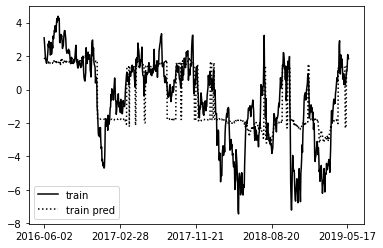

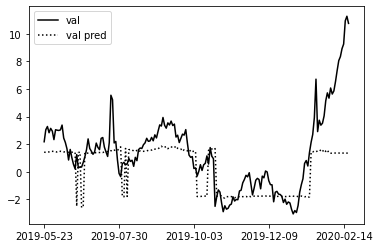

In [ ]:
y_train_pred = modelRNN.predict(X_train_values).reshape(-1,)
y_val_pred = modelRNN.predict(X_val_values).reshape(-1,)

fig1 = plt.figure()
plt.plot(y_train.index, y_train,
         label = 'train',
         color = 'black',
         linestyle = 'solid')
plt.plot(y_train.index, y_train_pred, 
         label= 'train pred',
         color = 'black',
         linestyle = 'dotted')
plt.xticks(y_train.index[np.arange(0,len(y_train.index)+1,186)])
plt.legend()

fig2 = plt.figure()
plt.plot(y_val.index, y_val, 
         label = 'val',
         color = 'black',
         linestyle = 'solid')
plt.plot(y_val.index, y_val_pred, 
         label = 'val pred',
         color = 'black',
         linestyle = 'dotted')
plt.xticks(y_val.index[np.arange(0,len(y_val.index)+1,46)])
plt.legend()

In [ ]:
from sklearn.metrics import r2_score

print('R score, RNN',r2_score(y_val,y_val_pred))

R score, RNN 0.2714510665900325


# LSTM

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
tf.random.set_seed(123)
tf.random.set_seed(321)

modelLSTM = Sequential()
modelLSTM.add(LSTM(70, activation = 'tanh')) 
modelLSTM.add(Dense(1,activation = 'linear'))
optimizer = optimizers.Adam(learning_rate = 0.01, 
                            beta_1 = 0.9, 
                            beta_2 = 0.999, 
                            amsgrad = True)
modelLSTM.compile(optimizer = optimizer, loss = 'mean_squared_error')
es = EarlyStopping(monitor = 'loss',
                  patience = 5,
                  verbose = 1)
modelLSTM.fit(X_train_values,y_train_values,
         epochs = 100, batch_size = 10,verbose = 1,
         callbacks = [es],
         validation_data = (X_val_values,y_val_values))

Epoch 1/100
75/75 [==============================] - 6s 43ms/step - loss: 3.3943 - val_loss: 5.4948
Epoch 2/100
75/75 [==============================] - 2s 33ms/step - loss: 3.4877 - val_loss: 5.3601
Epoch 3/100
75/75 [==============================] - 3s 35ms/step - loss: 3.2526 - val_loss: 4.9980
Epoch 4/100
75/75 [==============================] - 3s 38ms/step - loss: 3.1474 - val_loss: 6.2513
Epoch 5/100
75/75 [==============================] - 3s 36ms/step - loss: 3.1180 - val_loss: 4.9377
Epoch 6/100
75/75 [==============================] - 2s 32ms/step - loss: 3.0499 - val_loss: 5.8314
Epoch 7/100
75/75 [==============================] - 3s 33ms/step - loss: 3.0727 - val_loss: 5.5695
Epoch 8/100
75/75 [==============================] - 3s 35ms/step - loss: 2.8929 - val_loss: 5.9718
Epoch 9/100
75/75 [==============================] - 3s 34ms/step - loss: 2.6207 - val_loss: 5.8268
Epoch 10/100
75/75 [==============================] - 3s 36ms/step - loss: 2.3910 - val_loss: 5.4324

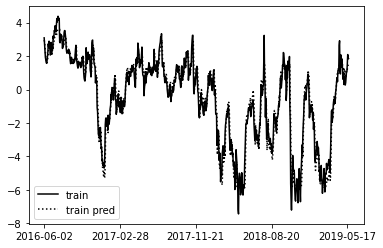

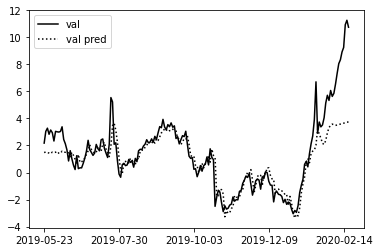

In [ ]:
y_train_pred = modelLSTM.predict(X_train_values).reshape(-1,)
y_val_pred = modelLSTM.predict(X_val_values).reshape(-1,)

fig3 = plt.figure()
plt.plot(y_train.index,y_train,label = 'train',
         color = 'black',
         linestyle = 'solid')
plt.plot(y_train.index, y_train_pred, 
         label= 'train pred',
         color = 'black',
         linestyle = 'dotted')
plt.xticks(y_train.index[np.arange(0,len(y_train.index)+1,186)])
plt.legend()


fig4 = plt.figure()
plt.plot(y_val.index,y_val, 
         label = 'val',
         color = 'black',
         linestyle = 'solid')
plt.plot(y_val.index, y_val_pred, 
         label = 'val pred', 
         color = 'black',
         linestyle = 'dotted')
plt.xticks(y_val.index[np.arange(0,len(y_val.index)+1,46)])
plt.legend()

In [ ]:
print('R score, LSTM',r2_score(y_val,y_val_pred))

R score, LSTM 0.6710590700581502


# GRU

In [ ]:
from tensorflow.keras.layers import GRU

tf.random.set_seed(123)
#tf.random.set_seed(0)
#tf.random.set_seed(321)

#tf.random.set_seed(321)
#tf.random.set_seed(777)
#tf.random.set_seed(1234)


modelGRU = Sequential()
modelGRU.add(GRU(70, activation = 'tanh')) 
modelGRU.add(Dense(1,activation = 'linear'))
optimizer = optimizers.Adam(learning_rate = 0.01, 
                            beta_1 = 0.9, 
                            beta_2 = 0.999, 
                            amsgrad = True)
modelGRU.compile(optimizer = optimizer, loss = 'mean_squared_error')
es = EarlyStopping(monitor = 'loss',
                  patience = 5,
                  verbose = 1)
modelGRU.fit(X_train_values,y_train_values,
         epochs = 100, batch_size = 10,verbose = 1,
         callbacks = [es],
         validation_data = (X_val_values,y_val_values))

print(len(modelGRU.predict(X_val_values)))
print(len(y_val_values))

Epoch 1/100
75/75 [==============================] - 7s 47ms/step - loss: 4.9888 - val_loss: 7.4588
Epoch 2/100
75/75 [==============================] - 3s 40ms/step - loss: 0.9455 - val_loss: 3.0265
Epoch 3/100
75/75 [==============================] - 4s 55ms/step - loss: 0.3762 - val_loss: 2.2336
Epoch 4/100
75/75 [==============================] - 6s 79ms/step - loss: 0.3641 - val_loss: 2.1109
Epoch 5/100
75/75 [==============================] - 5s 62ms/step - loss: 0.3553 - val_loss: 2.1329
Epoch 6/100
75/75 [==============================] - 5s 62ms/step - loss: 0.3793 - val_loss: 1.8353
Epoch 7/100
75/75 [==============================] - 5s 62ms/step - loss: 0.3616 - val_loss: 1.9936
Epoch 8/100
75/75 [==============================] - 4s 59ms/step - loss: 0.3445 - val_loss: 2.1102
Epoch 9/100
75/75 [==============================] - 5s 65ms/step - loss: 0.3576 - val_loss: 2.0374
Epoch 10/100
75/75 [==============================] - 3s 39ms/step - loss: 0.3813 - val_loss: 2.6416

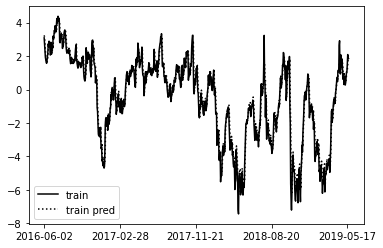

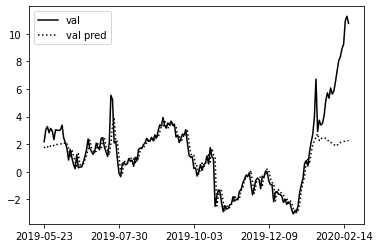

In [ ]:
y_train_pred = modelGRU.predict(X_train_values).reshape(-1,)
y_val_pred = modelGRU.predict(X_val_values).reshape(-1,)

fig5 = plt.figure()
plt.plot(y_train.index,y_train,label = 'train',color = 'black',linestyle = 'solid')
plt.plot(y_train.index, y_train_pred, 
         label= 'train pred',
         color = 'black',
         linestyle = 'dotted')
plt.xticks(y_train.index[np.arange(0,len(y_train.index)+1,186)])
plt.legend()


fig6 = plt.figure()
plt.plot(y_val.index, y_val, 
         label = 'val',
         color = 'black',
         linestyle = 'solid')
plt.plot(y_val.index, y_val_pred, 
         label = 'val pred', 
         color = 'black',
         linestyle = 'dotted')
plt.xticks(y_val.index[np.arange(0,len(y_val.index)+1,46)])
plt.legend()

In [ ]:
print('R score, GRU',r2_score(y_val,y_val_pred))

R score, GRU 0.5477938419012888


# 取引シミュレーション

## 閾値の候補

In [ ]:
diff = (y_train.shift(-1) - y_train).dropna()
diff_p = diff[diff > 0] 
diff_m = diff[diff <= 0]

quintile_range = (diff_m.quantile(0.2),diff_p.quantile(0.8))
decile_range = (diff_m.quantile(0.1),diff_p.quantile(0.9))

print('quintile threshold',quintile_range)
print('decile threshold',decile_range)

quintile threshold (-0.6580995723335163, 0.5848852794993905)
decile threshold (-0.936291679812178, 0.8216637678884808)


## 予測値の格納

In [ ]:
y_val_pred = modelGRU.predict(X_val_values).reshape(-1,)
y_test_pred = modelGRU.predict(X_test_values).reshape(-1,)

diff_val = (y_val_pred[1:] - y_val[:-1])
diff_test = (y_test_pred[1:] - y_test[:-1])

## 検証データを使って5分位点のシミュレーション

In [ ]:
pos_q = 0 # 0 for no position, 1 for long positon, -1 for short position
port_val_q = 0.0

# 5分位点の閾値検証        
for i,diff in enumerate(diff_val[:-1]): # 投資期間終了の直前までループ
    index = diff_val.index[i]
    if pos_q == 0:
        if diff > quintile_range[1]: # ロング・ポジションを組む
            pos_q = 1
            ini_val_q = pairs_value[index] 
            print('long position is made at', index, 
                  'by the value of ',pairs_value[index])
        elif diff < quintile_range[0]: # ショート・ポジションを組む
            pos_q = -1
            ini_val_q = pairs_value[index]
            print('short position is made at', index, 
                  'by the value of', pairs_value[index])
    #符号が反転したら利益を確定
    elif pos_q == 1 and diff < 0: # ロング・ポジションの利益確定
        port_val_q += (pairs_value[index] - ini_val_q)
        pos_q = 0 # ポジションを解消する
        print('long position is liquidated at',index,
              'current portfolio value is', port_val_q,
              'current pair value is', pairs_value[index])
    elif pos_q == -1 and diff > 0:# ショートポジションの利益確定
        port_val_q -= (pairs_value[index] - ini_val_q)
        pos_q = 0 # ポジションを解消する
        print('short position is liquidated at',index,
              'current portfolio value is', port_val_q,
              'current pair value is', pairs_value[index])
    
# 満期にポジションは強制終了
index = diff_val.index[-1]
if pos_q == 1:# ロング・ポジションの利益確定
    port_val_q += (pairs_value[index] - ini_val_q)        
    print('long position is liquidated at',index,
          'current portfolio value is', port_val_q)
if pos_q == -1:# ショート・ポジションの利益確定
    port_val_q -= (pairs_value[index] - ini_val_q)
    print('short position is liquidated at',index,
          'current portfolio value is', port_val_q)

print(port_val_q)

short position is made at 2019-05-24 by the value of 3.045519121944203
short position is liquidated at 2019-06-13 current portfolio value is 1.3761943377788057 current pair value is 1.669324784165397
short position is made at 2019-07-23 by the value of 5.547053921211116
short position is liquidated at 2019-07-25 current portfolio value is 4.833236598114979 current pair value is 2.090011660874943
short position is made at 2020-01-21 by the value of 3.9222815061432854
short position is liquidated at 2020-02-19 current portfolio value is -2.515842393826837
-2.515842393826837


## 検証データを使って10分位点のシミュレーション

In [ ]:
# 10分位点の閾値検証      
pos_d = 0
port_val_d = 0.0

#trade_count = 0 
for i,diff in enumerate(diff_val[:-1]):
    index = diff_val.index[i]
    if pos_d == 0:
        if diff > decile_range[1]: # ロング・ポジションを組む
            pos_d = 1
            ini_val_d = pairs_value[index]
            print('long position is made at', index, 
                  'by the value of ',pairs_value[index])

        elif diff < decile_range[0]: # ショート・ポジションを組む
            pos_d = -1
            ini_val_d = pairs_value[index]
            print('short position is made at', index, 
                  'by the value of', pairs_value[index])
    #符号が反転したら利益を確定
    elif pos_d == 1 and diff < 0: # ロング・ポジションの利益確定
        port_val_d += (pairs_value[index] - ini_val_d)
        pos_d = 0 # ポジションを解消する
        print('long position is liquidated at', index,
              'current value is', pairs_value[index])
    elif pos_d == -1 and diff > 0:# ショートポジションの利益確定
        port_val_d -= (pairs_value[index] - ini_val_d)
        pos_d = 0 # ポジションを解消する
        print('short position is liquidated at', index,
              'current value is', pairs_value[index])

# 満期にポジションは強制終了     
index = diff_val.index[-1]       
if pos_d == 1:# ロング・ポジションの解消
    port_val_d += (pairs_value[index] - ini_val_d)
    print('long position is liquidated at', index,
          'current value is', port_val_d)
if pos_d == -1:# ショート・ポジションの利益確定
    port_val_d -= (pairs_value[index] - ini_val_d)
    print('short position is liquidated at', index,
          'current value is', port_val_d)

print(port_val_d)

short position is made at 2019-05-24 by the value of 3.045519121944203
short position is liquidated at 2019-06-13 current value is 1.669324784165397
short position is made at 2019-07-23 by the value of 5.547053921211116
short position is liquidated at 2019-07-25 current value is 2.090011660874943
short position is made at 2020-01-21 by the value of 3.9222815061432854
short position is liquidated at 2020-02-19 current value is -2.515842393826837
-2.515842393826837


## 5分位点と10分位点のシミュレーション結果比較

In [ ]:
print((port_val_q,port_val_d))

(-2.515842393826837, -2.515842393826837)


In [ ]:
if port_val_q > port_val_d:
    threshold = quintile_range
else:
    threshold = decile_range

print('optimal threshold is', threshold)

optimal threshold is (-0.936291679812178, 0.8216637678884808)


## テストデータを用いた取引シミュレーション

In [ ]:
pos = 0 # 0 for no position, 1 for long positon, -1 for short position
port_val = 0.0
port_hist = pd.DataFrame()

for i,diff in enumerate(diff_test[:-1]):
    index = diff_test.index[i]
    if pos == 0:
        if diff > threshold[1]: # ロング・ポジションを組む
            pos = 1
            ini_val = pairs_value[index] 
            print('long position is made at', index, 
                  'by the value of ',pairs_value[index])
        elif diff < threshold[0]: # ショート・ポジションを組む
            pos = -1
            ini_val = pairs_value[index]
            print('short position is made at', index, 
                  'by the value of', pairs_value[index])
    #符号が反転したら利益を確定
    if pos == 1 and np.sign(diff) < 0: # ロング・ポジションの利益確定
        port_val += (pairs_value[index] - ini_val)
        pos = 0 # ポジションを解消する
        print('long position is liquidated at', index,
              'current value is', pairs_value[index])
    if pos == -1 and np.sign(diff) >= 0:# ショートポジションの利益確定
        port_val -= (pairs_value[index] - ini_val)
        pos = 0 # ポジションを解消する
        print('short position is liquidated at', index,
              'current value is', pairs_value[index])
    ser = pd.DataFrame([pos],index = [index])
    port_hist = port_hist.append(ser)

        
# 満期にポジションは強制終了
index = diff_test.index[-1]
if pos == 1:# ロング・ポジションの利益確定
    port_val += (pairs_value[index] - ini_val)
    print('long position is liquidated at', index,
          'current value is', pairs_value[index])
if pos == -1:# ショート・ポジションの利益確定
    port_val -= (pairs_value[index] - ini_val)
    print('short position is liquidated at', index,
          'current value is', pairs_value[index])
ser = pd.DataFrame([pos],index = [index])
port_hist = port_hist.append(ser)

print('Portfolio value is', port_val)

short position is made at 2020-02-21 by the value of 9.370475488439652
short position is liquidated at 2020-04-24 current value is 5.181479764989881
short position is made at 2020-04-28 by the value of 7.252526913534567
short position is liquidated at 2020-04-30 current value is 5.480736504546961
long position is made at 2020-05-06 by the value of  5.308710804203791
long position is liquidated at 2020-05-11 current value is 8.353473560515496
long position is made at 2020-05-18 by the value of  6.061184544760373
long position is liquidated at 2020-08-03 current value is 7.8828262986039235
short position is made at 2020-08-07 by the value of 8.455196323936903
short position is liquidated at 2020-08-14 current value is 8.005377094484864
short position is made at 2020-08-18 by the value of 9.3977261757449
short position is liquidated at 2020-11-09 current value is 8.430503829405176
short position is made at 2020-11-11 by the value of 10.316717562398928
short position is liquidated at 2020-

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


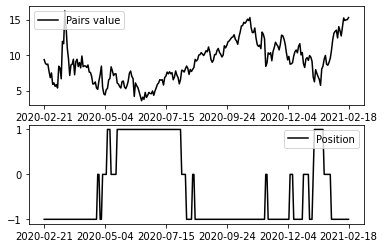

In [ ]:
fig8 = plt.figure()

ax1 = fig8.add_subplot(211)
ax1.plot(pairs_value[diff_test.index].index,
         pairs_value[diff_test.index].values,
         color='black',
         label='Pairs value')
ax1.set_xticks(pairs_value[diff_test.index].index[::50])
ax1.legend()

ax2 = fig8.add_subplot(212)
ax2.plot(port_hist.index,
         port_hist.values,
         color='black',
         label = 'Position')
ax2.set_yticks([-1,0,1])
ax2.set_xticks(port_hist.index[::50])
ax2.legend()